In [6]:
# 5k at each  100 m we can change
import numpy as np
total_dist = 5000
interval =100
shape = int(total_dist/interval)
# ucs in mpa 50-250 lets model 50-100 at each 50
np.random.seed(42)

#sequence_num = []
UCS = np.linspace(50, 250, shape)
RQD_per = []
RPM =[]
thrust =[]
ROP =[]
noise= []
k_thrust =1.2
k_RPM =4
k =1.5

for i in range(0, shape, 1):
    #sequence_num.append(i)
    # for loop slow so we can use df outside the loop since we know the chainage

    # we could UCS[i] = .... and finish all and then apped them and say thrust depends on UCS so
    # using simply append will return none at last

    UCS_noise =  np.abs(np.random.normal(0, 4))
    UCS[i]+=UCS_noise
    UCS[i]= UCS[i].clip(50,250) #.clip doesnt modify in place but returns a new value so we must reassign
    #UCS.append(np.random.uniform(50, 250)) #np.random.rand gens 50*250 array
    RQD_per.append(np.random.randint(20,100))
    thrust.append(k_thrust * UCS[-1]) # so that in each loop last added which is what we need is operated with
    RPM.append(k_RPM * (1/UCS[-1]))
    noise.append(np.random.normal(0, scale=9)) #not stdev but scale
    ROP.append(((k*thrust[-1]*RPM[-1])/UCS[-1]**1.5)  + noise[-1])   # m/hr

df = {
    'chainge': np.arange(0, total_dist, interval)
}


# we need abrasion index??
# geo type???
UCS



array([ 51.98685661,  58.52915313,  66.20711687,  64.17537314,
        68.65004315,  76.25767575,  84.24621918,  81.38480378,
        88.55838   ,  91.27205094,  93.21734193,  97.89426528,
        99.03358074, 104.60711629, 112.2033336 , 112.51648899,
       116.0112651 , 120.26230837, 126.45282592, 131.58736178,
       133.47591826, 140.23649493, 147.29862546, 148.00154911,
       150.75294471, 155.62615706, 160.97113835, 163.54326331,
       165.59309518, 169.81292936, 185.93816461, 177.13274768,
       180.96043317, 191.87100092, 192.2663306 , 196.09111727,
       202.80664705, 206.95010515, 206.47836298, 210.2101942 ,
       216.74652594, 223.00842174, 225.05652033, 226.3699594 ,
       230.6220383 , 236.94496344, 242.04522938, 242.07765553,
       246.23871669, 250.        ])

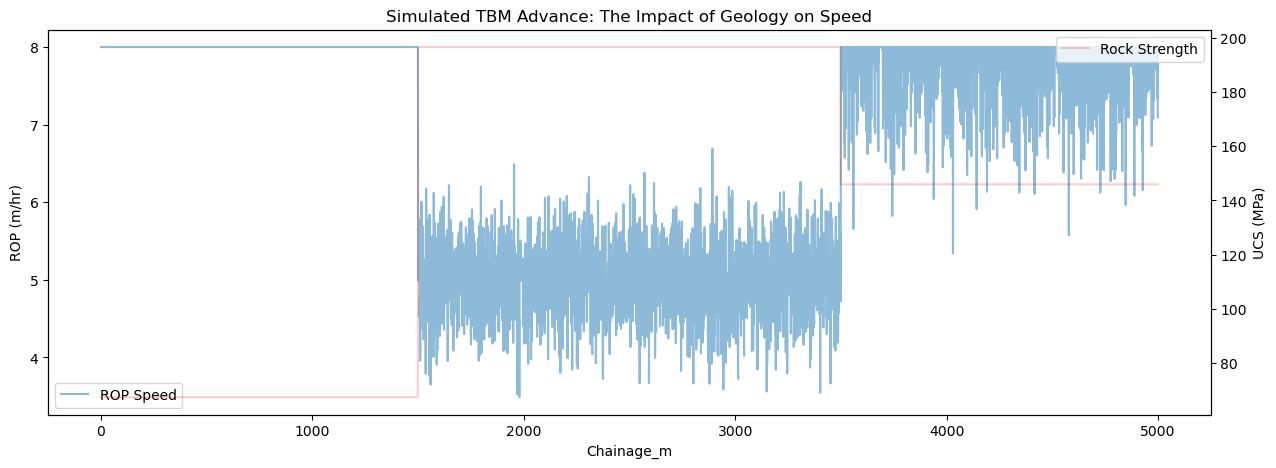

               UCS_MPa       RPM    RQD_pct    Thrust_KN  True_ROP  ROP_m_hr
Chainage_m                                                                  
4995        145.907542  7.972226  56.072331  4897.246842  8.075296  8.000000
4996        145.907542  7.144175  58.301674  5189.376432  7.668212  7.344228
4997        145.907542  7.356328  38.458426  5193.521212  7.902233  7.971891
4998        145.907542  7.341501  44.053355  5237.828137  7.953585  8.000000
4999        145.907542  6.670386  39.675131  5276.608450  7.280022  7.092718


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TOTAL_DIST = 5000  # meters
INTERVAL = 1       # 1 meter resolution (high fidelity)
N = int(TOTAL_DIST / INTERVAL)

np.random.seed(42)

df = pd.DataFrame({ # to create a df or else it will be a dictionary
    'Chainage_m': (np.arange(0, TOTAL_DIST, INTERVAL)) # if we put setindex here its wrong cuz its np stuff
}).set_index('Chainage_m')

df['UCS_MPa'] = 0.0 # initializie values
# hit values under a block

df.loc[0:1500, 'UCS_MPa'] = np.random.normal(60,15) # 1501 items, soft, phyllite
df.loc[1500:3500, 'UCS_MPa'] = np.random.normal(200,25) # granite hard
df.loc[3500:, 'UCS_MPa'] = np.random.normal(120,40) # mixed fault

df['RPM'] = 10 - (df['UCS_MPa']/60) + np.random.normal(0,0.5,N)
df['RPM'] = df['RPM'].clip(2,12)

df['RQD_pct'] = (df['UCS_MPa']/3) + np.random.normal(0,15,N)
# noise cuz fractured hard rock
df['RQD_pct'] = df['RQD_pct'].clip(10,100)


df['Thrust_KN'] =  3500 + (df['UCS_MPa']*12) +np.random.normal(0,400,N)
df['Thrust_KN'] = df['Thrust_KN'].clip(2000, 6000)

k = 0.6


df['True_ROP'] = k * (df['Thrust_KN'] * df['RPM']) / (df['UCS_MPa']**1.6)


df['ROP_m_hr'] = df['True_ROP'] + np.random.normal(0, 0.2, N)
df['ROP_m_hr'] = df['ROP_m_hr'].clip(0.1, 8.0) # Physics limits


fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=df, x='Chainage_m', y='ROP_m_hr', alpha=0.5, label='ROP Speed')
ax2 = ax.twinx()
sns.lineplot(data=df, x='Chainage_m', y='UCS_MPa', color='red', alpha=0.2, ax=ax2, label='Rock Strength')
ax.set_title("Simulated TBM Advance: The Impact of Geology on Speed")
ax.set_ylabel("ROP (m/hr)")
ax2.set_ylabel("UCS (MPa)")
plt.show()

# Inspect the first few rows
print(df.tail())